# **DLP Lab#01**
K213309 - Mohammad Yehya Hayati


---

## Lab Tasks
1) Create and run the Neural Network and draw the network diagram of an AND Gate.

2) Change no. of hidden layers.

3) Execute this for fewer epochs and learn the behavior.

4) Compute error for different learning rate, epochs, and hidden layers.

5) Repeat for NAND and XOR Gates.

## Intro


The following code is a modification of the given code on GCR. The modifications include a new hyper-parameter called '`numOfHiddenLayers`' which allows the user to control number of hidden layers (as specified in the task). Since we introduced this new hyper-parameter, we need to make sure that the number of weights is dynamic, therefore the code is modified to ensure this. The functional parts of the code have been separated into functions to make it easier to use.

In [54]:
# Libraries needed for Neural Network
import numpy as np
from matplotlib import pyplot as plt

In [55]:
# Activation Function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# A function to initialize all parameters used in testing and training of a model
def initParameters(Features, NeuronsPerLayer, numOfHiddenLayers, Output):
  # To make number of hidden layers dynamic we will make the parameters W and b an array/list

  # Initializing Weights
  W = []
  W.append(np.random.randn(NeuronsPerLayer, Features))
  for i in range(numOfHiddenLayers-1):
    W.append(np.random.randn(NeuronsPerLayer, NeuronsPerLayer))
  W.append(np.random.randn(Output, NeuronsPerLayer))

  # Initializing bias
  b = []
  for i in range(numOfHiddenLayers):
    b.append(np.zeros((NeuronsPerLayer, 1)))
  b.append(np.zeros((Output, 1)))

  # Packing parameters in an object
  params = {"W" : W, "b": b}
  return params

# A function for forward propagation
def forwardPropagation(X, params, numOfHiddenLayers):
  # Since we have made the number of hidden layers variable, we will be working in lists of data from nom onwards

  # Temp list for weights
  W = []

  # Temp list for bias
  b = []

  # Temp list for sigmoid input
  Z = []

  # Temp list for sigmoid output
  A = []

  # Populating Temp lists of weight and bias
  for i in range(numOfHiddenLayers+1):
    W.append(params["W"][i])
    b.append(params["b"][i])

  # Begining forward propagation and populating A & Z
  A.append(X)
  for i in range(numOfHiddenLayers+1):
    Z.append(np.dot(W[i], A[i]) + b[i])
    A.append(sigmoid(Z[i]))

  # Using a cache variable to transfer data (in structured form) from one function to another
  cache = (A, W)
  return cache, A

# A function for backward propagation
def backwardPropagation(X, Y, cache, numOfHiddenLayers):
  # Destructuring the cache
  (A, W) = cache

  # Creating temp lists for the partial Derivative of error/output {which is dE/dA}, delta {which is dE/dZi}, change in weight, and change in bias
  E = []
  delta = []
  dW = []
  db = []

  # Calculating delta values for each hidden layer, and using delta values to calculate change in bias
  E.insert(0, A[-1]-Y)
  for i in range(numOfHiddenLayers):
    delta.insert(0, E[0] * A[-i-1] * (1-A[-i-1]))
    db.insert(0, np.sum(delta[0], axis = 1, keepdims = True))
    E.insert(0, np.dot(W[-i-1].T, delta[0]))
  delta.insert(0, E[0] * A[1] * (1-A[1]))
  db.insert(0, np.sum(delta[0], axis = 1, keepdims = True))

  # Using delta values to calculate change in weights
  for i in range(numOfHiddenLayers+1):
    dW.append(np.dot(delta[i], A[i].T))

  # Packing all changes in parameters in an object
  gradients = {'dW': dW, 'db': db}
  return gradients

# A function to update parameters in each hidden layer
def updateParameters(params, gradients, numOfHiddenLayers, learningRate):
  for i in range(numOfHiddenLayers+1):
    params["W"][i] = params["W"][i] - learningRate * gradients["dW"][i]
    params["b"][i] = params["b"][i] - learningRate * gradients["db"][i]
  return params

# Giving forward & backward propagation better names
test = forwardPropagation
train = backwardPropagation

# A function to encorporate testing and training as well as loss calculation of model
def generateModel(X, Y, neuronsInHiddenLayers, numOfHiddenLayers, epoch, learningRate):
  parameters = initParameters(X.shape[0], neuronsInHiddenLayers, numOfHiddenLayers, Y.shape[0])
  losses = np.zeros((epoch, 1))
  for i in range(epoch):
    cache, A = test(X, parameters, numOfHiddenLayers)
    losses[i, 0] = -np.sum(np.multiply(np.log(A[-1]), Y) + np.multiply(np.log(1 - A[-1]), (1 - Y))) / X.shape[1]
    gradients = backwardPropagation(X, Y, cache, numOfHiddenLayers)
    parameters = updateParameters(parameters, gradients, numOfHiddenLayers, learningRate)
  return parameters, losses

## Task#1


1) Create and run the Neural Network and draw the network diagram of an AND Gate.

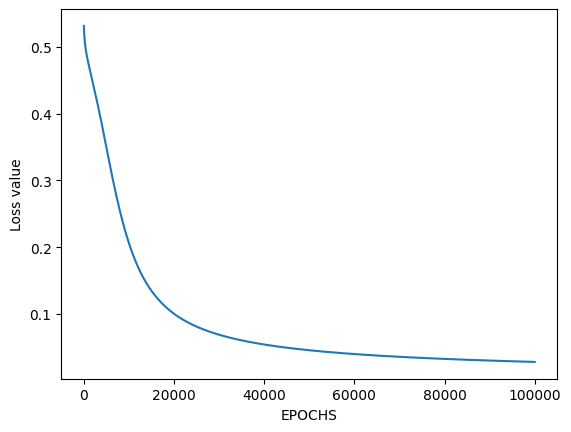

Model Results:
[[1 1 0 0 0 1]]


In [56]:
ANDModel, losses = generateModel(np.array([[0, 0, 1, 1], [0, 1, 0, 1]]),            # X
                          np.array([[0, 0, 0, 1]]),                                 # Y
                          2,                                                        # neuronsInHiddenLayer
                          1,                                                        # numOfHiddenLayers
                          100000,                                                   # epoch
                          0.01)                                                     # learningRate
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

_, result = test(np.array([[1,1,0,1,0,1], [1,1,1,0,0,1]]),                          # Unseen Data
                    ANDModel,                                                       # Trained Model
                    1)                                                              # numOfHiddenLayers
print('Model Results:')
print((result[-1]>0.5)*1)

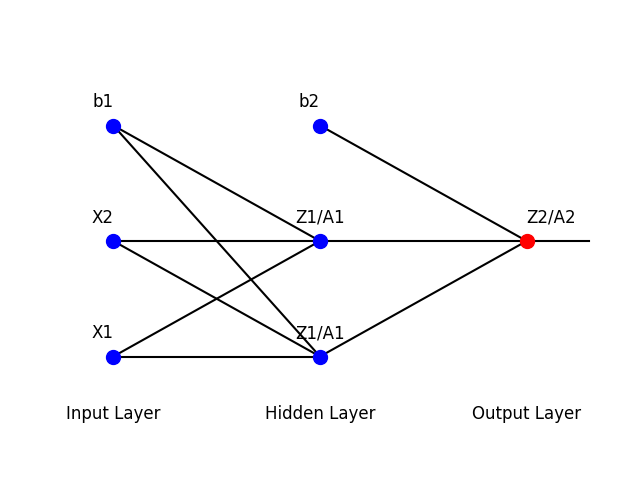

In [57]:
plt.figure(figsize=(8, 6))

plt.scatter(0, 0, s=100, color='blue', zorder=5)
plt.text(0, 0.2, 'X1', verticalalignment='center', horizontalalignment='right', fontsize=12)

plt.scatter(0, 1, s=100, color='blue', zorder=5)
plt.text(0, 1.2, 'X2', verticalalignment='center', horizontalalignment='right', fontsize=12)

plt.scatter(0, 2, s=100, color='blue', zorder=5)
plt.text(0, 2.2, 'b1', verticalalignment='center', horizontalalignment='right', fontsize=12)

plt.text(0, -0.5, 'Input Layer', verticalalignment='center', horizontalalignment='center', fontsize=12)


plt.scatter(1, 0, s=100, color='blue', zorder=5)
plt.text(1, 0.2, 'Z1/A1', verticalalignment='center', horizontalalignment='center', fontsize=12)

plt.scatter(1, 1, s=100, color='blue', zorder=5)
plt.text(1, 1.2, 'Z1/A1', verticalalignment='center', horizontalalignment='center', fontsize=12)

plt.scatter(1, 2, s=100, color='blue', zorder=5)
plt.text(1, 2.2, 'b2', verticalalignment='center', horizontalalignment='right', fontsize=12)

plt.text(1, -0.5, 'Hidden Layer', verticalalignment='center', horizontalalignment='center', fontsize=12)


plt.scatter(2, 1, s=100, color='red', zorder=5)
plt.text(2, 1.2, 'Z2/A2', verticalalignment='center', horizontalalignment='left', fontsize=12)

plt.text(2, -0.5, 'Output Layer', verticalalignment='center', horizontalalignment='center', fontsize=12)

for i in range(3):
    for j in range(2):
        plt.plot([0, 1], [i, j], color='black')

for i in range(3):
    for j in range(1,2):
        plt.plot([1, 2], [i, j], color='black')

plt.plot([2, 2.3], [1, 1], color='black')

plt.xlim(-0.5, 2.5)
plt.ylim(-1, 3)
plt.gca().axis('off')

plt.show()

The above graph is only for a specific Neural Network with 2 input features, 2 neurons per layer, 1 hidden layer, and 1 output neuron.

## Task #2


2) Change no. of hidden layers.

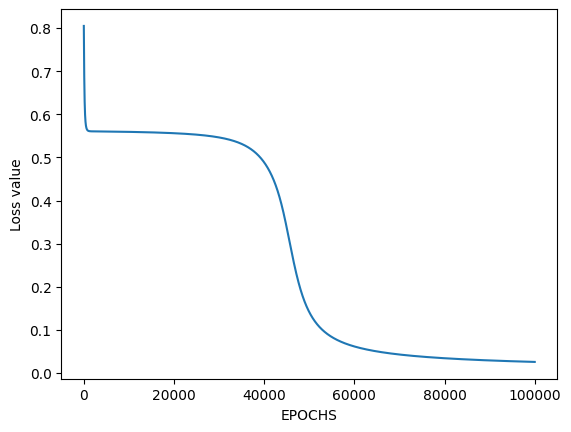

Model Results:
[[1 1 0 0 0 1]]


In [58]:
# Changing numOfHiddenLayers to 3 from 1
numOfHiddenLayers = 3
ANDModel, losses = generateModel(np.array([[0, 0, 1, 1], [0, 1, 0, 1]]),            # X
                          np.array([[0, 0, 0, 1]]),                                 # Y
                          2,                                                        # neuronsInHiddenLayer
                          numOfHiddenLayers,                                        # numOfHiddenLayers
                          100000,                                                   # epoch
                          0.01)                                                     # learningRate

plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

_, result = test(np.array([[1,1,0,1,0,1], [1,1,1,0,0,1]]),                          # Unseen Data
                    ANDModel,                                                       # Trained Model
                    numOfHiddenLayers)                                              # numOfHiddenLayers
print('Model Results:')
print((result[-1]>0.5)*1)

## Task #3


3) Execute this for fewer epochs and learn the behavior.

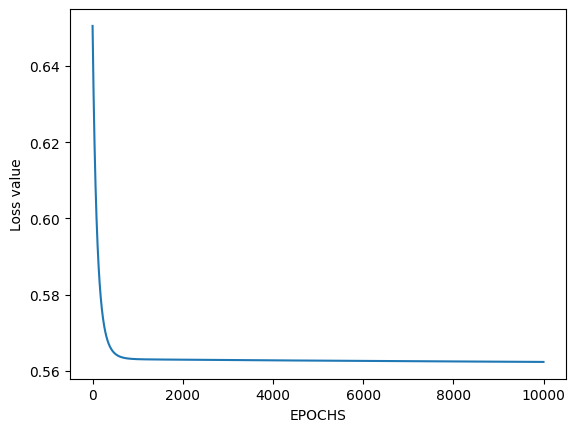

Model Results:
[[0 0 0 0 0 0]]


In [59]:
#Changing number of epochs from 100000 to 10000
numOfHiddenLayers = 3
epochs = 10000
ANDModel, losses = generateModel(np.array([[0, 0, 1, 1], [0, 1, 0, 1]]),            # X
                          np.array([[0, 0, 0, 1]]),                                 # Y
                          2,                                                        # neuronsInHiddenLayer
                          numOfHiddenLayers,                                        # numOfHiddenLayers
                          epochs,                                                   # epoch
                          0.01)                                                     # learningRate

plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

_, result = test(np.array([[1,1,0,1,0,1], [1,1,1,0,0,1]]),                          # Unseen Data
                    ANDModel,                                                       # Trained Model
                    numOfHiddenLayers)                                              # numOfHiddenLayers
print('Model Results:')
print((result[-1]>0.5)*1)

We can see that when we divide the number of epochs by 10, the model gives us an incorrect result. This is because the there are not enough epochs for the the weights to adjust.

Also by comparing the graph in Task#2 and Task#3, we can see that the graph in Task#3 is just a part of the graph in Task#2, and it proves the point that there are not enough epochs as shown in the graph of Task#2 (after 40000 epochs the loss value drops).

## Task #4


4) Compute error for different learning rate, epochs, and hidden layers.

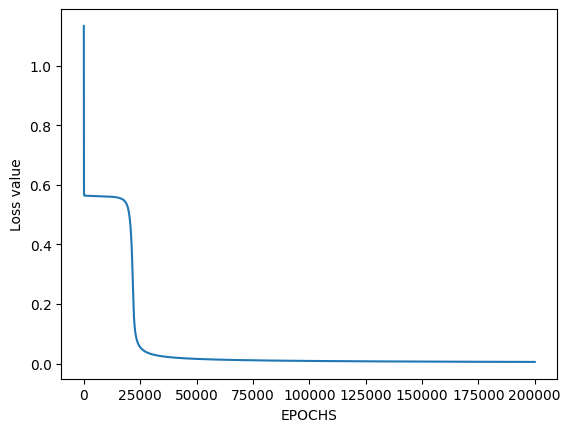

Model Results:
[[1 1 0 0 0 1]]


In [60]:
neuronsInHiddenLayer = 8
numOfHiddenLayers = 8
epochs = 200000
learningRate = 0.02
ANDModel, losses = generateModel(np.array([[0, 0, 1, 1], [0, 1, 0, 1]]),            # X
                          np.array([[0, 0, 0, 1]]),                                 # Y
                          neuronsInHiddenLayer,                                     # neuronsInHiddenLayer
                          numOfHiddenLayers,                                        # numOfHiddenLayers
                          epochs,                                                   # epoch
                          learningRate)                                             # learningRate
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

_, result = test(np.array([[1,1,0,1,0,1], [1,1,1,0,0,1]]),                          # Unseen Data
                    ANDModel,                                                       # Trained Model
                    numOfHiddenLayers)                                              # numOfHiddenLayers
print('Model Results:')
print((result[-1]>0.5)*1)

## Task #5


5) Repeat for NAND and XOR Gates.

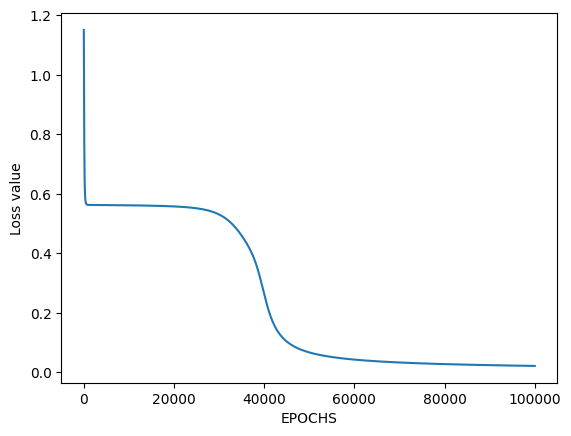

Model Results:
[[0 0 1 1 1 0]]


In [61]:
neuronsInHiddenLayer = 4
numOfHiddenLayers = 4
epochs = 100000
learningRate = 0.01

NANDModel, losses = generateModel(np.array([[0, 0, 1, 1], [0, 1, 0, 1]]),           # X
                          np.array([[1, 1, 1, 0]]),                                 # Y
                          neuronsInHiddenLayer,                                     # neuronsInHiddenLayer
                          numOfHiddenLayers,                                        # numOfHiddenLayers
                          epochs,                                                   # epoch
                          learningRate)                                             # learningRate
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

_, result = test(np.array([[1,1,0,1,0,1], [1,1,1,0,0,1]]),                          # Unseen Data
                    NANDModel,                                                      # Trained Model
                    numOfHiddenLayers)                                              # numOfHiddenLayers
print('Model Results:')
print((result[-1]>0.5)*1)

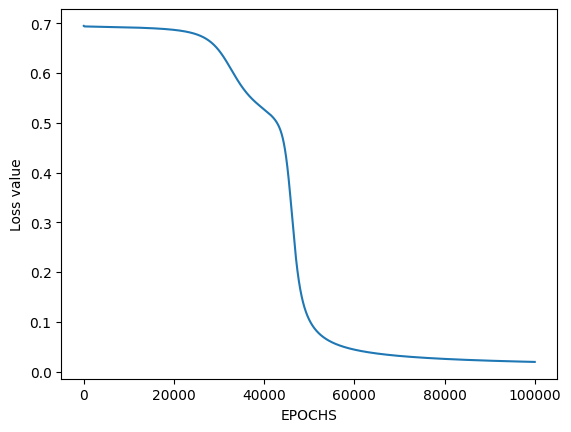

Model Results:
[[0 0 1 1 0 0]]


In [62]:
neuronsInHiddenLayer = 4
numOfHiddenLayers = 4
epochs = 100000
learningRate = 0.01

XORModel, losses = generateModel(np.array([[0, 0, 1, 1], [0, 1, 0, 1]]),            # X
                          np.array([[0, 1, 1, 0]]),                                 # Y
                          neuronsInHiddenLayer,                                     # neuronsInHiddenLayer
                          numOfHiddenLayers,                                        # numOfHiddenLayers
                          epochs,                                                   # epoch
                          learningRate)                                             # learningRate
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

_, result = test(np.array([[1,1,0,1,0,1], [1,1,1,0,0,1]]),                          # Unseen Data
                    XORModel,                                                       # Trained Model
                    numOfHiddenLayers)                                              # numOfHiddenLayers
print('Model Results:')
print((result[-1]>0.5)*1)